In [2]:
# import all the things!
import ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bqplot.pyplot as bplt # importing the matplotlib-like interfact for the bqplot viz engine

In [6]:
@ipywidgets.interact(sentence='')
def my_phrase_print(sentence):
    print(sentence)

interactive(children=(Text(value='', description='sentence'), Output()), _dom_classes=('widget-interact',))

In [5]:
my_phrase_print('hi there')

hi there


## A few more individual widgets

In [7]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

In [9]:
itext.value

14

In [10]:
itext.value = 100

In [11]:
slider = ipywidgets.IntSlider(min=0, max=10, step=1)

In [12]:
slider

IntSlider(value=0, max=10)

In [15]:
slider.value = 9

In [16]:
dir(slider)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_repr_keys',
 '_send',
 '_should_send_property

In [17]:
slider.observe?

In [18]:
# start by making a function that prints out the value of the slider
def print_slider(change): # "handler" function
    print(change) # first doing stuff with "callbacks" its nice to print out what is going on!

In [19]:
slider.observe(print_slider, 'value') # observe for changes in trait of "value" of the slider and do "print_slider"

In [20]:
slider

IntSlider(value=8, max=10)

{'name': 'value', 'old': 8, 'new': 7, 'owner': IntSlider(value=7, max=10), 'type': 'change'}
{'name': 'value', 'old': 7, 'new': 6, 'owner': IntSlider(value=6, max=10), 'type': 'change'}
{'name': 'value', 'old': 6, 'new': 5, 'owner': IntSlider(value=5, max=10), 'type': 'change'}
{'name': 'value', 'old': 5, 'new': 4, 'owner': IntSlider(value=4, max=10), 'type': 'change'}


We'll start making this observe/slider combo more complex:

In [21]:
def print_slider2(change):
    print('old:', change['old'], 'new:', change['new'])

In [23]:
slider2 = ipywidgets.IntSlider(min=0, max=10, step=1)

In [24]:
# observe for changes in slider2's value
slider2.observe(print_slider2, 'value')

In [25]:
# display this slider:
slider2

IntSlider(value=0, max=10)

old: 0 new: 1
old: 1 new: 2
old: 2 new: 3
old: 3 new: 4
old: 4 new: 3
old: 3 new: 2
old: 2 new: 3
old: 3 new: 4
old: 4 new: 5
old: 5 new: 6


Now that I have access to the `change['new']` by itself in my handler function I can drive changes in *another* widget with changes in the slider.

Use a label widget and have what it is showing (printing out) be tied to updates in the slider.

In [26]:
# make a label widget
myLabel = ipywidgets.Label()
myLabel

Label(value='')

In [27]:
myLabel.value = 'Hi I am a label.'

For example, when the slider's value is 8, I want the label to say "The slider is at 8".

In [28]:
# start by making another slider to drive changes
slider3 = ipywidgets.IntSlider(min=0, max=10, step=1)

In [31]:
"hi there " + str(8) #'hello'

'hi there 8'

In [32]:
def print_slider3(change):
    #print('old:', change['old'], 'new:', change['new'])
    myLabel.value = "The slider is at " + str(change['new']) # last part changes the number to a string

In [33]:
# link with .observe to changes in the SLIDER -- looks for changes in value of slider
# NOT changes in the label -- changes in the label are being driven by changes in the slider
slider3.observe(print_slider3, 'value')

In [46]:
#slider3.new
slider3.observe?

In [34]:
slider3

IntSlider(value=0, max=10)

In [35]:
myLabel

Label(value='Hi I am a label.')

In [39]:
slider3.observe?

In [36]:
# do something fancy with layout of the widgets
# Horizontal box to put them side by side
ipywidgets.HBox([slider3, myLabel])

In [37]:
ipywidgets.VBox([slider3, myLabel])

In [38]:
slider4 = ipywidgets.IntSlider(min=0, max=10, step=1)

def print_slider_weirdo(bob):
    print(bob)
    
slider4.observe(print_slider_weirdo, 'value')
slider4

IntSlider(value=0, max=10)

{'name': 'value', 'old': 0, 'new': 1, 'owner': IntSlider(value=1, max=10), 'type': 'change'}
{'name': 'value', 'old': 1, 'new': 2, 'owner': IntSlider(value=2, max=10), 'type': 'change'}
{'name': 'value', 'old': 2, 'new': 3, 'owner': IntSlider(value=3, max=10), 'type': 'change'}
{'name': 'value', 'old': 3, 'new': 4, 'owner': IntSlider(value=4, max=10), 'type': 'change'}
{'name': 'value', 'old': 4, 'new': 3, 'owner': IntSlider(value=3, max=10), 'type': 'change'}
{'name': 'value', 'old': 3, 'new': 2, 'owner': IntSlider(value=2, max=10), 'type': 'change'}
{'name': 'value', 'old': 2, 'new': 3, 'owner': IntSlider(value=3, max=10), 'type': 'change'}
{'name': 'value', 'old': 3, 'new': 4, 'owner': IntSlider(value=4, max=10), 'type': 'change'}
{'name': 'value', 'old': 4, 'new': 5, 'owner': IntSlider(value=5, max=10), 'type': 'change'}
{'name': 'value', 'old': 5, 'new': 6, 'owner': IntSlider(value=6, max=10), 'type': 'change'}
{'name': 'value', 'old': 6, 'new': 5, 'owner': IntSlider(value=5, max=

## Read in planet data and then do some interactive plots with it!

In [47]:
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv', 
                     sep=",", comment="#")

In [48]:
planets

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,0.320000,-0.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,3.200000,-3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.230000,-0.230000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.500000,-2.500000,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.000000,-1.000000,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,4160,tau Gem,b,tau Gem b,Radial Velocity,0,1,305.500000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4160,4161,ups And,b,ups And b,Radial Velocity,0,3,4.617033,0.000023,-0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4161,4162,ups And,c,ups And c,Radial Velocity,0,3,241.258000,0.064000,-0.064000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4162,4163,ups And,d,ups And d,Radial Velocity,0,3,1276.460000,0.570000,-0.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


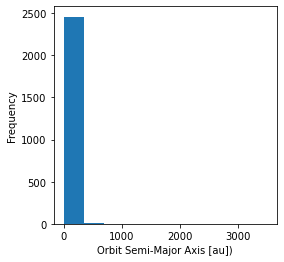

In [51]:
# make a quick plot with looking at the semi-major axis
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(planets['pl_orbsmax'])
ax.set_xlabel('Orbit Semi-Major Axis [au])')
ax.set_ylabel('Frequency')
plt.show()

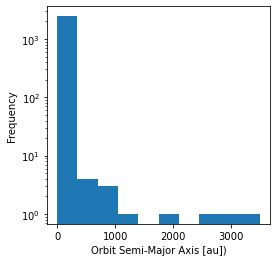

In [52]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(planets['pl_orbsmax'])
ax.set_xlabel('Orbit Semi-Major Axis [au])')
ax.set_ylabel('Frequency')
ax.set_yscale('log') # log instead of linear scale
plt.show()

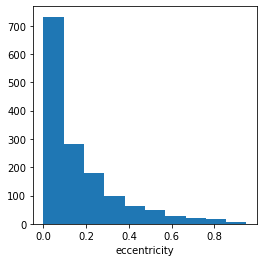

In [55]:
# let's make a quick plot for the eccentricity
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.hist(planets['pl_orbeccen'])
ax.set_xlabel('eccentricity')
plt.show()

In [56]:
# quick interactive scatter plot using bqplot
fig = bplt.figure()

scatter_plot = bplt.scatter(planets['pl_orbsmax'], planets['pl_orbeccen'])

fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [62]:
#planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv',
#                      comment="#")

In [63]:
#planets

In [96]:
# downsample our data for interactivity
nsamples = 100
randomInds = np.random.choice(range(len(planets)-1), 
                              nsamples, 
                              replace=False)

In [73]:
len(randomInds)

100

In [74]:
planetsDS = planets.iloc[randomInds]

In [75]:
planetsDS

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
1873,1874,Kepler-135,c,Kepler-135 c,Transit,0,2,11.448708,0.000145,-0.000145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
746,747,HD 31253,b,HD 31253 b,Radial Velocity,0,1,466.000000,3.000000,-3.000000,...,0.365,0.003,0.0,0.18,0.004,0.0,0.418,0.005,0.0,8.0
2142,2143,Kepler-1552,b,Kepler-1552 b,Transit,0,1,184.771853,0.001546,-0.001546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
923,924,HD 99109,b,HD 99109 b,Radial Velocity,0,1,439.299990,5.600000,-5.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1295,1296,K2-63,b,K2-63 b,Transit,0,2,20.257000,0.007200,-0.007200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3899,TOI-216,c,TOI-216.01,Transit,0,2,34.556000,0.014000,-0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1297,1298,K2-64,b,K2-64 b,Transit,0,1,6.530440,0.000670,-0.000670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
163,164,GJ 27.1,b,GJ 27.1 b,Radial Velocity,0,1,15.819000,0.023000,-0.026000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1693,1694,Kepler-1212,b,Kepler-1212 b,Transit,0,1,12.941301,0.000079,-0.000079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [76]:
# figure but using the downsampled dataset
fig = bplt.figure()

scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'])

fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [81]:
# figure but using the downsampled dataset
fig = bplt.figure()
#fig.layout.min_width=800
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'])

bplt.xlim(0,15)

#fig
bplt.show()

In [82]:
scatter_plot.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'color',
 'colors',
 'default_opacities',
 'default_size',
 'default_skew',
 'display_legend',
 'display_names',
 'drag_color',
 'drag_size',
 'enable_delete',
 'enable_hover',
 'enable_move',
 'fill',
 'hovered_point',
 'hovered_style',
 'interactions',
 'labels',
 'marker',
 'names',
 'names_unique',
 'opacity',
 'preserve_domain',
 'restrict_x',
 'restrict_y',
 'rotation',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'size',
 'skew',
 'stroke',
 'stroke_width',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unhovered_style',
 'unselected_style',
 'update_on_move',
 'visible',
 'x',
 'y']

In [83]:
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'],
                           interactions={'click':'select'}) # adding in a select points interaction

bplt.xlim(0,15)

bplt.show()

In [86]:
scatter_plot.selected

array([83], dtype=uint32)

In [95]:
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], 
                            planetsDS['pl_orbeccen'],
                            interactions={'click':'select'},
                            selected_style={'fill':'red'}) 

bplt.xlim(0,15)

bplt.show()

In [115]:
scatter_plot.selected

array([20], dtype=uint32)

In [116]:
#scatter_plot.keys

In [117]:
planetsDS.iloc[scatter_plot.selected]

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
724,725,HD 25171,b,HD 25171 b,Radial Velocity,0,1,1802.29,24.12,-22.92,...,0.345,0.003,0.0,0.154,0.004,0.0,0.371,0.006,0.0,10.0


In [118]:
planetsDS.iloc[scatter_plot.selected]['pl_facility']

724    La Silla Observatory
Name: pl_facility, dtype: object

Right now the facility name of my selected row is NOT a string, we want to grab the string so we'll do a bit of data formatting to get it.

In [119]:
planetsDS.iloc[scatter_plot.selected]['pl_facility'].values

array(['La Silla Observatory'], dtype=object)

Using the `.values` function from Pandas we are getting an array of selected facilities, but we just want the one value!  Index this selection:

In [120]:
planetsDS.iloc[scatter_plot.selected]['pl_facility'].values[0]

'La Silla Observatory'

Make a label widget and update it with the name of the facility based on what is selected on my scatter plot.

In [121]:
planetLabel = ipywidgets.Label()
planetLabel

Label(value='')

In [122]:
planetLabel.value = planetsDS.iloc[scatter_plot.selected]['pl_facility'].values[0]

In [123]:
# do a quick a look at what happens when we "observe" for changes in our scatter plot
def on_selection(change):
    print(change) # get a sense of what is going on!
    
scatter_plot.observe(on_selection, 'selected')

In [126]:
fig
bplt.show()

{'name': 'selected', 'old': array([70], dtype=uint32), 'new': array([20], dtype=uint32), 'owner': Scatter(colors=['steelblue'], hovered_point=20, interactions={'click': 'select'}, scales={'x': LinearScale(max=15.0, min=0.0), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, selected=array([20], dtype=uint32), selected_style={'fill': 'red'}, tooltip_style={'opacity': 0.9}, x=array([0.103  , 1.26   ,     nan, 1.11   , 0.1627 , 0.0785 ,     nan,
       0.048  ,     nan,     nan,     nan,     nan, 0.0818 ,     nan,
       0.3343 , 0.1768 , 2.07   ,     nan,     nan, 1.02   , 2.971  ,
       0.064  ,     nan,     nan, 0.423  ,     nan, 0.207  , 6.6    ,
           nan, 0.281  ,     nan, 0.038  ,     nan, 0.68   , 0.141  ,
       

Start combining all of the hardwork we just did above!

In [127]:
# 1. Creates the figure
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], 
                            planetsDS['pl_orbeccen'],
                            interactions={'click':'select'},
                            selected_style={'fill':'red'}) 

bplt.xlim(0,15)

# 2. Put in the handler function
def on_selection(change):
    print(change) # get a sense of what is going on!
    
# 3. observe for changes (selection changes) on scatter plot
scatter_plot.observe(on_selection, 'selected')

# display the figure
#bplt.show()
fig

Figure(axes=[Axis(scale=LinearScale(max=15.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

{'name': 'selected', 'old': None, 'new': array([78], dtype=uint32), 'owner': Scatter(colors=['steelblue'], hovered_point=78, interactions={'click': 'select'}, scales={'x': LinearScale(max=15.0, min=0.0), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, selected=array([78], dtype=uint32), selected_style={'fill': 'red'}, tooltip_style={'opacity': 0.9}, x=array([0.103  , 1.26   ,     nan, 1.11   , 0.1627 , 0.0785 ,     nan,
       0.048  ,     nan,     nan,     nan,     nan, 0.0818 ,     nan,
       0.3343 , 0.1768 , 2.07   ,     nan,     nan, 1.02   , 2.971  ,
       0.064  ,     nan,     nan, 0.423  ,     nan, 0.207  , 6.6    ,
           nan, 0.281  ,     nan, 0.038  ,     nan, 0.68   , 0.141  ,
       0.156  , 0.193  , 0.1

In [128]:
# 1. Creates the figure
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], 
                            planetsDS['pl_orbeccen'],
                            interactions={'click':'select'},
                            selected_style={'fill':'red'}) 

bplt.xlim(0,15)

# 2. Put in the handler function
def on_selection(change):
    #print(change) # get a sense of what is going on!
    print(change['new']) # look at what is "new" about our change
    
# 3. observe for changes (selection changes) on scatter plot
scatter_plot.observe(on_selection, 'selected')

# display the figure
fig

Figure(axes=[Axis(scale=LinearScale(max=15.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

[20]
[24]
[78]
[66]
[93]
[70]


In [129]:
# 1. Creates the figure
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], 
                            planetsDS['pl_orbeccen'],
                            interactions={'click':'select'},
                            selected_style={'fill':'red'}) 

bplt.xlim(0,15)

# 2. Put in the handler function
def on_selection(change):
    #print(change) # get a sense of what is going on!
    #print(change['new']) # look at what is "new" about our change
    # technically we can call as is, but let's be better programmers!
    #planetLabel.value = planetsDS.iloc[scatter_plot.selected]['pl_facility'].values[0]
    planetLabel.value = planetsDS.iloc[change['new']]['pl_facility'].values[0]

# 3. observe for changes (selection changes) on scatter plot
scatter_plot.observe(on_selection, 'selected')

# display the figure
fig

Figure(axes=[Axis(scale=LinearScale(max=15.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

In [131]:
planetLabel

Label(value='Gemini Observatory')

Final step is to put the scatterplot and the label in the same cell:

In [132]:
# 1. Creates the figure
fig = bplt.figure()
scatter_plot = bplt.scatter(planetsDS['pl_orbsmax'], 
                            planetsDS['pl_orbeccen'],
                            interactions={'click':'select'},
                            selected_style={'fill':'red'}) 

bplt.xlim(0,15)

# 2. Put in the handler function
def on_selection(change):
    planetLabel.value = planetsDS.iloc[change['new']]['pl_facility'].values[0]

# 3. observe for changes (selection changes) on scatter plot
scatter_plot.observe(on_selection, 'selected')

# 4. display the figure & the label
ipywidgets.VBox([planetLabel, fig])